# THE SPARKS FOUNDATION INTERNSHIP

## PREDICTION USING SUPERVISED ML

## BY: HARINI VISWANATHAN

## TASK - 1 

## IMPORTING LIBRARIES

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## READING THE DATA

In [2]:
data = pd.read_csv("C:\\Users\\HARINI\\Documents\\SPARKS_FOUNDATION\\student_scores - student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## DATA PREPROCESSING 

In [3]:
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe(include="all")

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## DATA VISUALIZATION

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

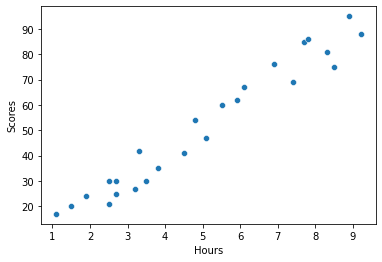

In [6]:
sns.scatterplot(x=data["Hours"],y=data["Scores"]) #plot the data

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

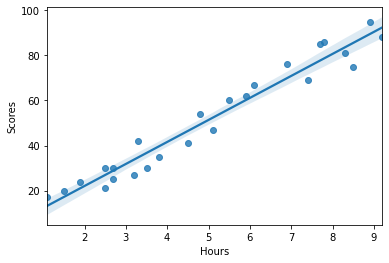

In [7]:
sns.regplot(x=data["Hours"],y=data["Scores"]) #regression plot gives a better and clear visualization for such data.

## Separate feature(s) and target

In [8]:
X = data[['Hours']]
Y = data['Scores']

In [9]:
from sklearn.model_selection import train_test_split
train_X,val_X,train_Y,val_Y = train_test_split(X,Y,random_state=0)

## Model Building

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [11]:
regressor.fit(train_X,train_Y)

LinearRegression()

In [12]:
pred_Y = regressor.predict(val_X)

In [13]:
pd.DataFrame({'Actual':val_Y,'Predicted':pred_Y})

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


<AxesSubplot:xlabel='Scores', ylabel='Density'>

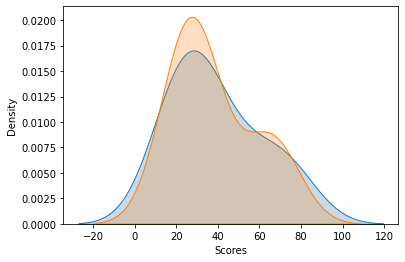

In [14]:
## Actual vs Predicted distribution plot

sns.kdeplot(pred_Y,label="Predicted",shade=True)

sns.kdeplot(data=val_Y,label="Actual",shade=True)

In [15]:
print("Train accuracy:",regressor.score(train_X,train_Y),'\nTest accuracy:',regressor.score(val_X,val_Y))

Train accuracy: 0.9484509249326872 
Test accuracy: 0.9367661043365055


In [16]:
#Predict percent for custom input value for hours
#Q.What will be predicted score if a student studies for 9.25 hrs/day?

h = [[9.25]]
s = regressor.predict(h)
print('A student who studies ',h[0][0],'hours is estimated to score',s[0])

A student who studies  9.25 hours is estimated to score 93.89272889341655
